# **Convolutional Neural Networks and Computer Vision with TensorFlow**

Computer vision is the practice of writing algorithms which can discover patterns in visual data.

Such as the camera of a self-driving car recognizing the car in front.

## Get the data
The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

🔑 Note: We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2026-01-20 16:55:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.135.207, 74.125.142.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   184MB/s    in 0.6s    

2026-01-20 16:55:36 (184 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



# Inspect the data (become one with it)
A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Jan 20 16:55 .
drwxr-xr-x 1 root root 4096 Jan 20 16:55 ..
drwxr-xr-x 4 root root 4096 Jan 20 16:55 test
drwxr-xr-x 4 root root 4096 Jan 20 16:55 train


In [8]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [9]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class_names from the subdirectories
class_names = class_names[1:] # remove .DS_store
print(class_names)

['steak']


In [10]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['129536.jpg']
Image shape: (512, 384, 3)


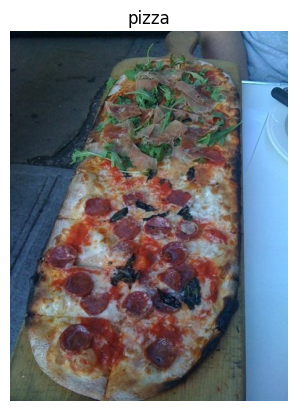

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [12]:
224, 224, 3

(224, 224, 3)

In [13]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  3,  13,  15],
        [  5,  15,  17],
        [  8,  17,  22],
        ...,
        [ 97, 153, 200],
        [ 94, 150, 197],
        [ 79, 135, 182]],

       [[  4,  14,  16],
        [  6,  16,  18],
        [  8,  17,  22],
        ...,
        [101, 157, 204],
        [ 98, 154, 201],
        [ 85, 141, 188]],

       [[  1,  11,  13],
        [  2,  12,  14],
        [  4,  13,  18],
        ...,
        [102, 160, 206],
        [103, 161, 207],
        [ 94, 152, 198]],

       ...,

       [[ 57,  75,  61],
        [ 59,  77,  63],
        [ 64,  80,  69],
        ...,
        [101, 145, 192],
        [102, 146, 191],
        [103, 147, 192]],

       [[ 53,  73,  61],
        [ 52,  72,  60],
        [ 54,  71,  61],
        ...,
        [ 98, 145, 191],
        [ 99, 146, 190],
        [100, 147, 191]],

       [[ 51,  71,  59],
        [ 46,  66,  54],
        [ 45,  62,  52],
        ...,
        [ 97, 144, 19

In [14]:
# view the image shape
img.shape # returns width, height, colour channels

(512, 384, 3)

> 🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [ ]:
# Get all the pixel values between 0 & 1 (scale/normalize the data, as neural networks love values between 0 & 1)
img/255

array([[[1.        , 0.99607843, 0.98823529],
        [1.        , 0.99607843, 0.98039216],
        [1.        , 0.99607843, 0.98039216],
        ...,
        [0.41176471, 0.28235294, 0.3254902 ],
        [0.39215686, 0.27058824, 0.32941176],
        [0.37254902, 0.2627451 , 0.31764706]],

       [[1.        , 0.99607843, 0.98823529],
        [1.        , 0.99607843, 0.98039216],
        [1.        , 0.99607843, 0.98039216],
        ...,
        [0.40784314, 0.28235294, 0.3254902 ],
        [0.39215686, 0.28235294, 0.32941176],
        [0.37647059, 0.28235294, 0.33333333]],

       [[1.        , 0.99607843, 0.98823529],
        [1.        , 0.99607843, 0.98039216],
        [1.        , 0.99607843, 0.98039216],
        ...,
        [0.39607843, 0.29019608, 0.3254902 ],
        [0.38823529, 0.30588235, 0.34117647],
        [0.38039216, 0.31372549, 0.34509804]],

       ...,

       [[1.        , 1.        , 0.96470588],
        [1.        , 1.        , 0.95294118],
        [1.        , 1

# **An end-to-end example**
Let's build a convolutional neural network to find patterns in our images, more specifically we a need way to:

- Load our images
- Preprocess our images
- Build a CNN to find patterns in our images
- Compile our CNN
- Fit the CNN to our training data

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


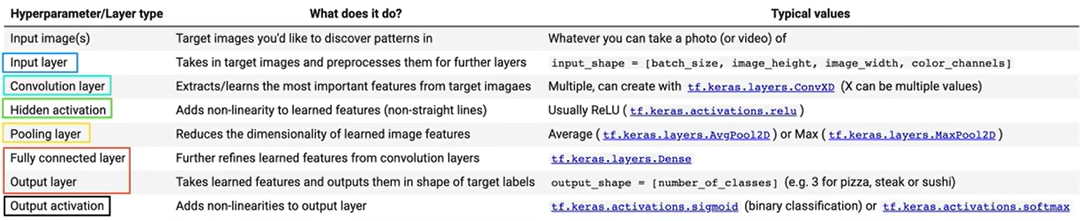

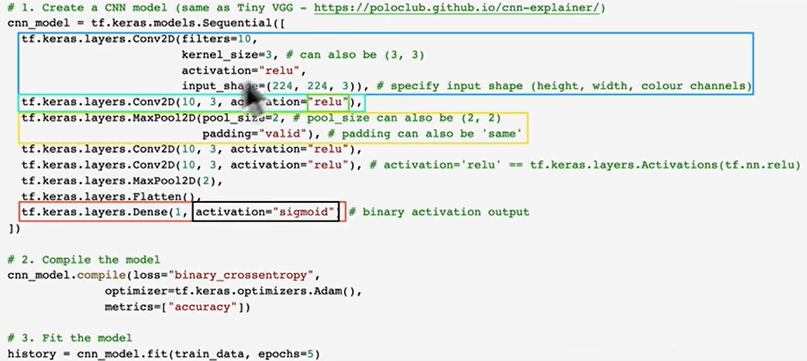

In [ ]:
# build a CNN model

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_1, built=True>

In [ ]:
# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 17s 223ms/step - accuracy: 0.6542 - loss: 0.6120 - val_accuracy: 0.8000 - val_loss: 0.4269
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8198 - loss: 0.4158 - val_accuracy: 0.8360 - val_loss: 0.3825
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.8286 - loss: 0.3774 - val_accuracy: 0.8460 - val_loss: 0.3551
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.8733 - loss: 0.3403 - val_accuracy: 0.8500 - val_loss: 0.3344
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.8778 - loss: 0.2926 - val_accuracy: 0.8580 - val_loss: 0.3170


> 🔑 Note: If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above).

Looks like our model performed well enough to beat the accuracy of the original Food101 dataset paper: https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/static/bossard_eccv14_food-101.pdf

(however, our results are of course not fully comparable, their model got 50.76% accuracy across 101 classes, our model achieved ~88% accuracy on 2 classses)

In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

🛠 Practice/exercise: Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network with thiers: https://poloclub.github.io/cnn-explainer/

# Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.4997 - loss: 2.0367 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.4934 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.5201 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.5268 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.5106 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932


In [ ]:
model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.5827 - loss: 7.3924 - val_accuracy: 0.5720 - val_loss: 0.9147
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 108ms/step - accuracy: 0.6966 - loss: 0.7724 - val_accuracy: 0.7840 - val_loss: 0.4505
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 97ms/step - accuracy: 0.7485 - loss: 0.5866 - val_accuracy: 0.7880 - val_loss: 0.5758
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.7516 - loss: 0.6337 - val_accuracy: 0.5400 - val_loss: 1.2807
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7193 - loss: 0.6536 - val_accuracy: 0.7560 - val_loss: 0.5053


In [ ]:
model_3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
15000000/31000

483.8709677419355

> 🔑 Note: You can think of trainable parameters as patterns a model can learn from data. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using.

> Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

In [ ]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

# Binary Classification: Let's break it down



* Become one with the data (visualize, visualize, visualize)
* Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve the model (try to beat our baseline)
* Repeat until satisfied (experiment, experiment, experiment)



# 1. Become one with the data

['2495884.jpg']
Image shape: (512, 512, 3)
['1984976.jpg']
Image shape: (384, 512, 3)


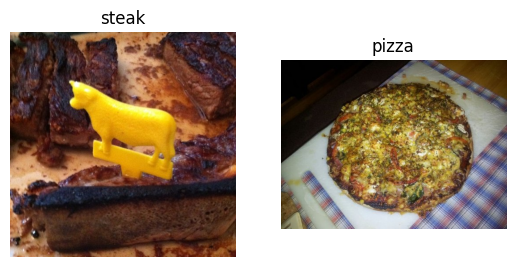

In [16]:
import matplotlib.pyplot as plt
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# 2. Preprocess the data (prepare it for a model)

In [17]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:

- 10,000 images (or more) might not fit into the memory of your processor (GPU).
- Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?s=20

In [18]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

In [19]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(directory=train_dir, # Target directoy of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
train_data[0]

(array([[[[0.6862745 , 0.6862745 , 0.6862745 ],
          [1.        , 1.        , 1.        ],
          [0.8431373 , 0.8431373 , 0.8431373 ],
          ...,
          [0.86274517, 0.86274517, 0.86274517],
          [0.9215687 , 0.9215687 , 0.9215687 ],
          [0.8078432 , 0.8078432 , 0.8078432 ]],
 
         [[0.9725491 , 0.9725491 , 0.9725491 ],
          [0.9921569 , 0.9921569 , 0.9921569 ],
          [0.9607844 , 0.9607844 , 0.9607844 ],
          ...,
          [0.9568628 , 0.9568628 , 0.9568628 ],
          [0.9921569 , 0.9921569 , 0.9921569 ],
          [0.9686275 , 0.9686275 , 0.9686275 ]],
 
         [[0.8078432 , 0.8078432 , 0.8078432 ],
          [0.9490197 , 0.9490197 , 0.9490197 ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [0.9843138 , 0.9843138 , 0.9843138 ],
          [0.8352942 , 0.8352942 , 0.8352942 ]],
 
         ...,
 
         [[0.78823537, 0.78823537, 0.78823537],
          [0.99215

In [21]:
# Get a sample of a train data batch
images, labels = next(train_data) # get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

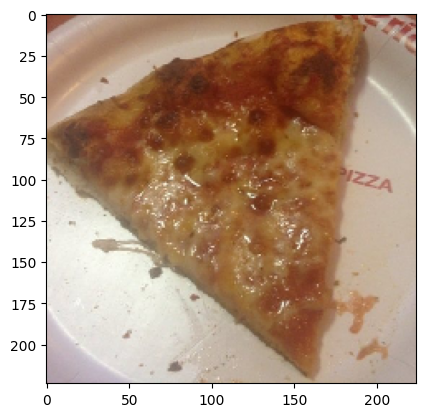

In [22]:
plt.imshow(images[0])

In [ ]:
images[0].shape

(224, 224, 3)

In [ ]:
labels

array([0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0.],
      dtype=float32)

# 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 Note: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [23]:
# import libraries creating of our models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# baseline model
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=(3, 3), # batch size of sliding windows going across an input
           strides=(1, 1), # size of step sliding window takes across an input
           padding='valid', # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


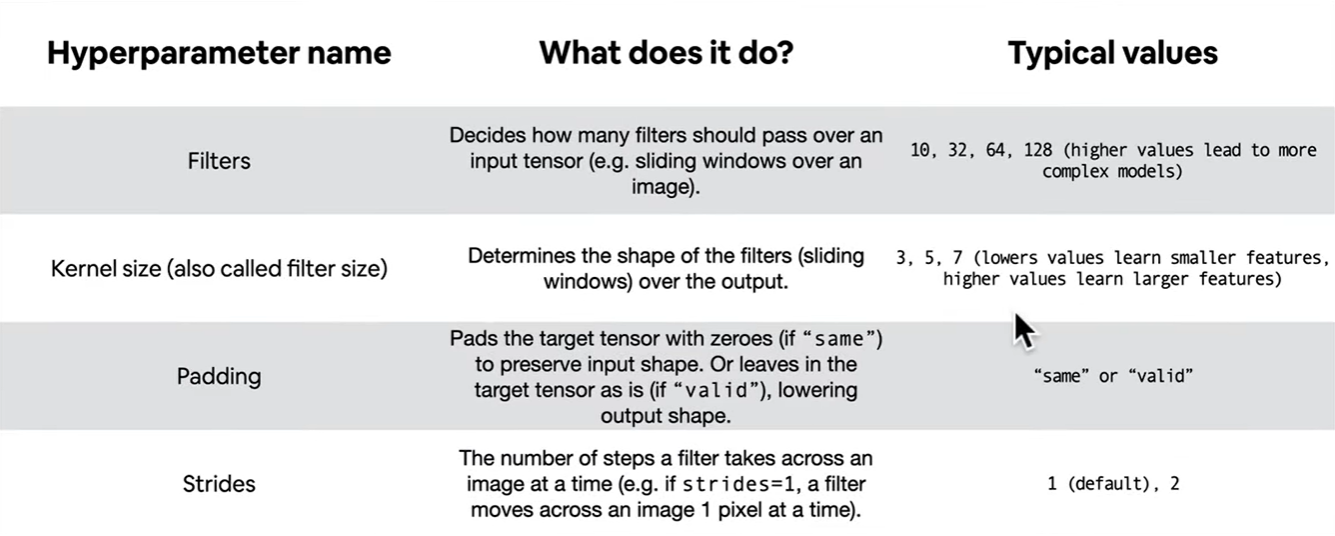

In [ ]:
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Fit the model

In [ ]:
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4 = model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 277ms/step - accuracy: 0.5528 - loss: 2.9668 - val_accuracy: 0.7280 - val_loss: 0.5585
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.7309 - loss: 0.5609 - val_accuracy: 0.7940 - val_loss: 0.4812
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7606 - loss: 0.4846 - val_accuracy: 0.7880 - val_loss: 0.4731
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.8323 - loss: 0.3962 - val_accuracy: 0.7900 - val_loss: 0.4810
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 133ms/step - accuracy: 0.9370 - loss: 0.2130 - val_accuracy: 0.7560 - val_loss: 0.5499


# Evaluate the model

<Axes: >

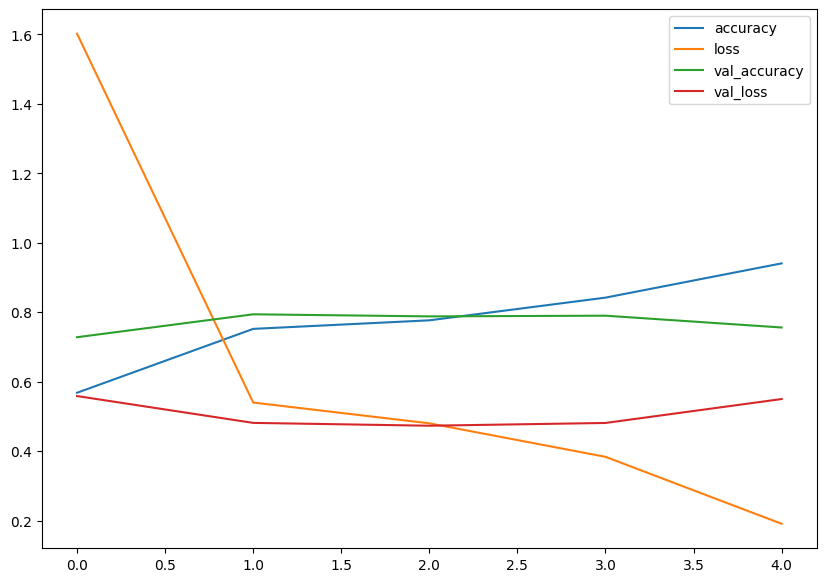

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [24]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

> 🔑 Note: When a model's validation loss starts to increase, it's likely that the model is overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus the model's ability to generalize to unseen data will be diminished.

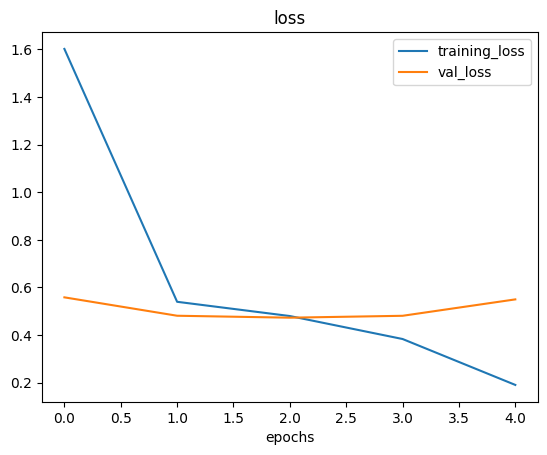

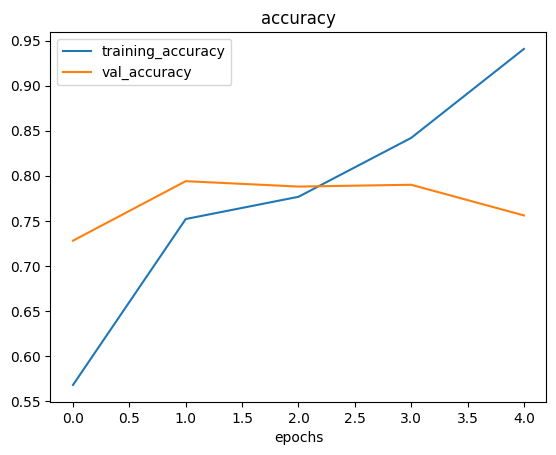

In [ ]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

> 🔑 Note: Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be overfitting.

# 6. Adjust the model parameters
Fitting a machine learning model comes in 3 steps:

- Create a baseline
- Beat the baseline by overfitting a larger model
- Reduce overfitting

**Ways to induce overfitting**:

- Increase the number of conv layers
- Increase the number of conv filters
- Add another dense layer to the output of our flattened layer

**Reduce overfitting**:

- Add data augmentation
- Add regularization layers (such as MaxPool2D)
- Add more data...

> 🔑 Note: Reducing overfitting is also known as regularization.

In [ ]:
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - accuracy: 0.5681 - loss: 0.6702 - val_accuracy: 0.7920 - val_loss: 0.4907
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8005 - loss: 0.4682 - val_accuracy: 0.8320 - val_loss: 0.3724
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - accuracy: 0.8040 - loss: 0.4154 - val_accuracy: 0.8500 - val_loss: 0.3464
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8489 - loss: 0.3749 - val_accuracy: 0.8640 - val_loss: 0.3233
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - accuracy: 0.8509 - loss: 0.3683 - val_accuracy: 0.8660 - val_loss: 0.3218


In [ ]:
model_5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

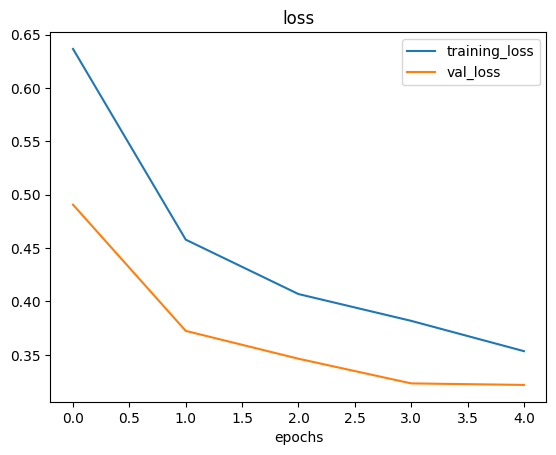

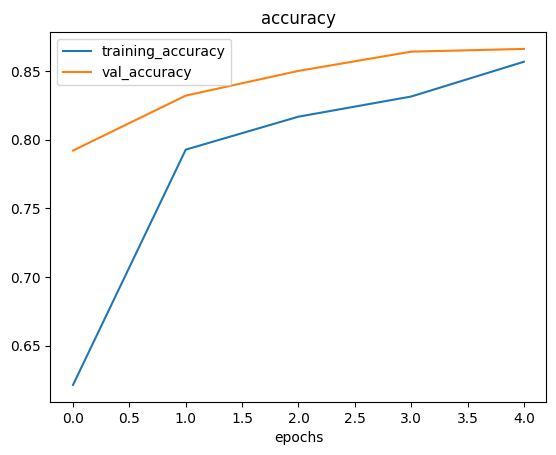

In [ ]:
# Plot loss curve
plot_loss_curves(history_5)

---

# **Data Augmentation**

**Opening our bag of tricks and finding data augmentation**

> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [25]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2, # zoom in randomly on an image
                                             width_shift_range=0.2, # move your iamge around on the x-axis
                                             height_shift_range=0.2, # move your image around on the y-axis
                                             horizontal_flip=True) # do you want to flip and image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [26]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE = (224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


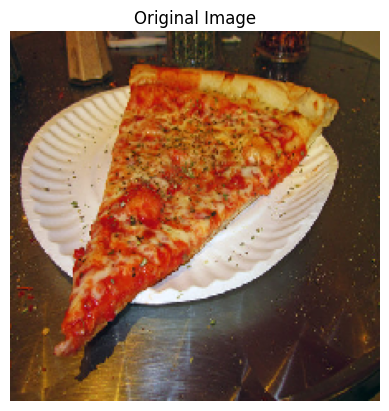

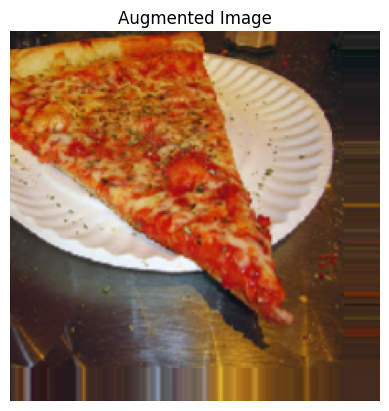

In [35]:
# Get sample data batches
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented) # note: labels aren't augmented... only data (images)


plt.imshow(images[9])
plt.title('Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[9])
plt.title('Augmented Image')
plt.axis(False);

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [36]:
# Create a model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 29s 493ms/step - accuracy: 0.5511 - loss: 0.7335 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 455ms/step - accuracy: 0.5332 - loss: 0.6881 - val_accuracy: 0.5160 - val_loss: 0.6679
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 417ms/step - accuracy: 0.5359 - loss: 0.6957 - val_accuracy: 0.6060 - val_loss: 0.6886
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.5519 - loss: 0.6891 - val_accuracy: 0.5940 - val_loss: 0.6504
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 427ms/step - accuracy: 0.5654 - loss: 0.7148 - val_accuracy: 0.7500 - val_loss: 0.6576


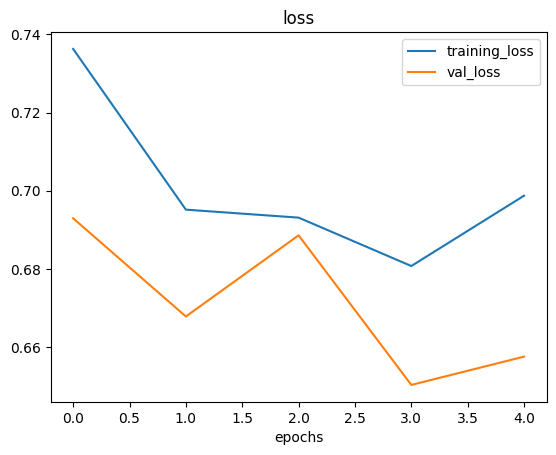

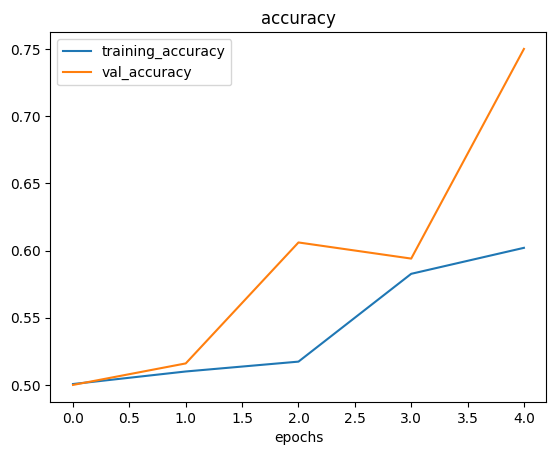

In [37]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [38]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            batch_size=32,
                                                                            shuffle=True) # shuffle data this time

Found 1500 images belonging to 2 classes.


In [39]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 449ms/step - accuracy: 0.5967 - loss: 0.6582 - val_accuracy: 0.8080 - val_loss: 0.4771
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 424ms/step - accuracy: 0.7142 - loss: 0.5716 - val_accuracy: 0.8400 - val_loss: 0.3928
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 456ms/step - accuracy: 0.7668 - loss: 0.4989 - val_accuracy: 0.8440 - val_loss: 0.3693
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 424ms/step - accuracy: 0.7879 - loss: 0.4573 - val_accuracy: 0.8680 - val_loss: 0.3462
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 442ms/step - accuracy: 0.7917 - loss: 0.4647 - val_accuracy: 0.8400 - val_loss: 0.3849


> 🔑 Note: When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

In [40]:
model_7.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

# 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to contine to improve our model:

- Increase the number of model layers (e.g. add more Conv2D/MaxPool2D layers)
- Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
- Train for longer (more epochs)
- Find an ideal learning rate
- Get more data (give the model more opportunities to learn)
- Use transfer learning to leverage what another image model has learn and adjust it for our own use case

> 🛠 Practice: Recreate the model on the CNN explainer website (same as model_1) and see how it performs on the augmented shuffled training data.